Импортирую Pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from statistics import median
import seaborn as sns

In [4]:
sAn = pd.read_csv( "archive/anime.csv" )
sRa = pd.read_csv( "archive/rating.csv" )

In [5]:
sAn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Создаю гистограмму рейтинга по 10-ти бальной шкале:

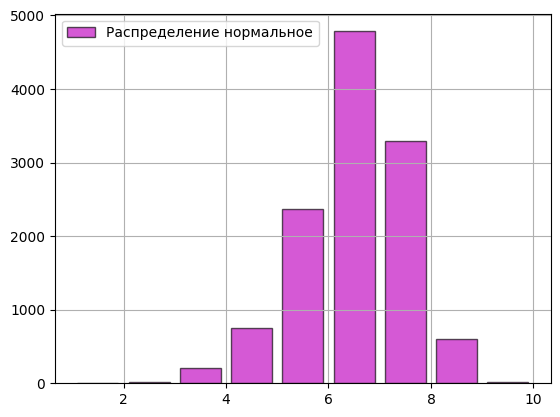

In [6]:
x = sAn.rating

plt.hist(x, bins = np.arange(1,11), rwidth = 0.8, edgecolor = "k", facecolor="m", alpha = 0.65, label="Распределение нормальное")
plt.legend()
plt.grid(which="major")
plt.show()

Создаю боксплот с теми же данными:

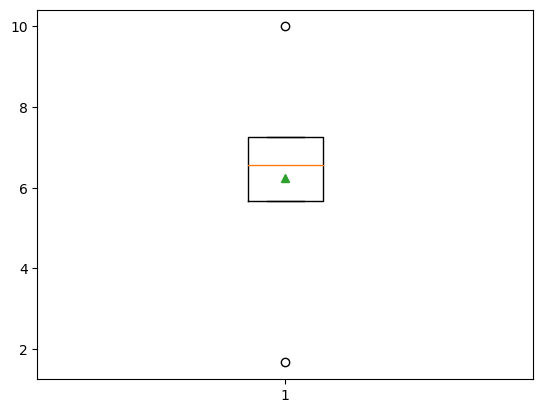

In [7]:
x1 = sAn.rating
xMin = min(x1)
xMax = max(x1)
xMedian = x1.median()
x25 = []
x75 = []
for i in x1: 
    if i>=xMin and i<= xMedian: x25.append(i)
x25Mean = mean(x25)
for i in x1: 
    if (i>=xMedian and i<=xMax ): x75.append(i)
x75Mean = mean(x75)
data = [xMin, x25Mean, xMedian, x75Mean, xMax]
plt.boxplot(data, showmeans=True)
plt.show()

Параметр showmeans показывает среднее арифметическое

Боксплот - это диаграмма, которая показывает, как распределяются значения переменной. Он также известен как график усов, и он дает нам информацию об изменчивости и дисперсии данных с использованием сводки из пяти чисел. К ним относятся минимум, первый квартиль (Q1), медиана, третий квартиль (Q3) и максимум.
Прямоугольник показывает значения от Q1 до Q3 (x25Mean и x75Mean соответственно), где Q1 - это число между наименьшим числом и медианой набора данных, а Q3 - это число между наибольшим числом и медианой набора данных

Построю диаграмму рассеивания, в качестве непрерывных значений возьму рейтинг и количество участников:

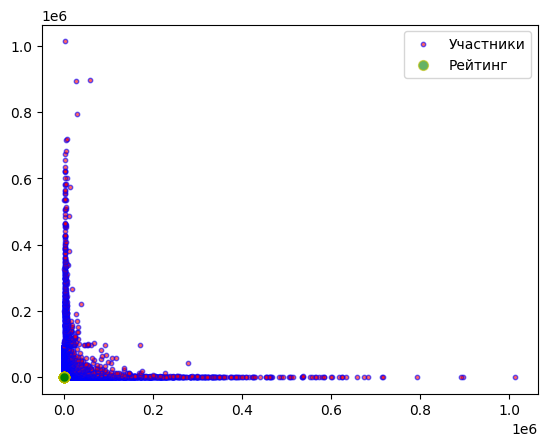

In [8]:
x1 = (sAn.rating.unique())
y1 = (sorted(sAn.rating.unique()))

x2 = (sAn.members.unique())
y2 = (sorted(sAn.members.unique()))


plt.scatter(x2, y2, 10, facecolor = "r", edgecolor = "b", alpha = 0.6, label = "Участники")
plt.scatter(x1, y1, 50, facecolor = "g", edgecolor = "y", alpha = 0.6, label = "Рейтинг")

plt.legend()

plt.show()

Гистограмма соотношений рейтинга и количества участников:

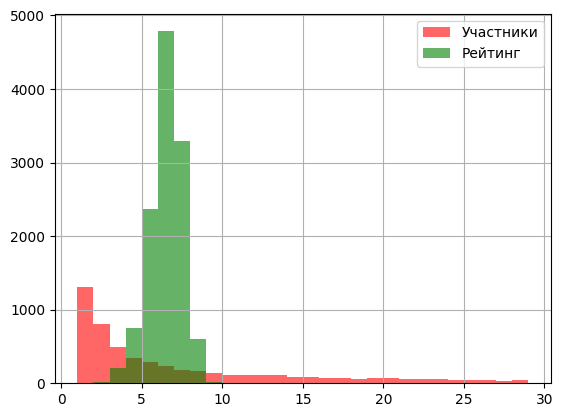

In [9]:
x1 = sAn.rating
x2 = sAn.members/1000
plt.hist(x2, bins = np.arange(1,30), facecolor="r", alpha = 0.6, label="Участники")
plt.hist(x1, bins = np.arange(1,30), facecolor="g", alpha = 0.6, label="Рейтинг")
plt.legend()
plt.grid(which="major")
plt.show()

Матрица корреляций:

<Axes: >

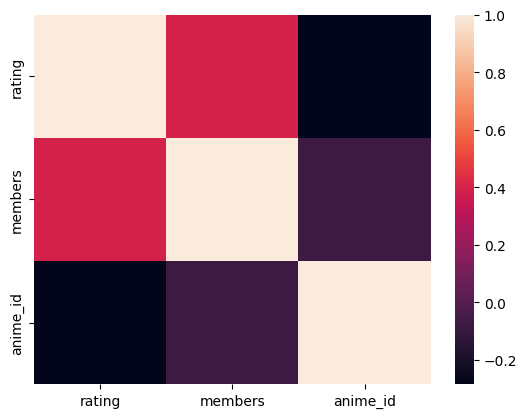

In [66]:
sns.heatmap(sAn[["rating","members", "anime_id"]].corr())

Также для матрицы корреляций можно было не указывать конкретные числовые столбцы, тк функция не работает с иными данными и автоматически опускает их, но при этом выводит сообщение об этом.

Выберу в качестве непрерывной переменной - Рейтинг, а в качестве категориальной - жанр

Гистограмма Y (рейтинг) относительно переменной X (жанра):

Мы проходимся по жанру, соотносим с каждым из них среднюю оценку и строим на этом основании гистограмму (3265 сочетаний жанров)

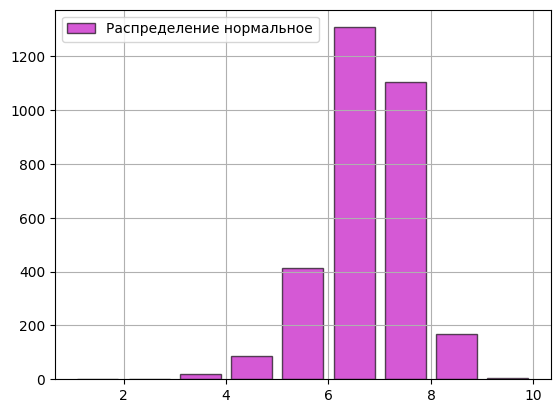

In [11]:
x = sAn.genre
y = sAn.rating
xy = sAn[['genre','rating']]
data = []
sh = x.value_counts()
for i in x.unique():
    num = 0
    buff = 0
    buffArr=[]
    buffArr = x.isin([i])
    kek = 0
    for j in buffArr:
        if j == True:
            buff+=y.loc[kek]
            num+=1
        kek+=1
    data.append(buff/num)
    
plt.hist(data, bins = np.arange(1,11), rwidth = 0.8, edgecolor = "k", facecolor="m", alpha = 0.65, label="Распределение нормальное")
plt.legend()
plt.grid(which="major")
plt.show()

Диаграмма размаха (boxplot) относительно переменной X (жанра):

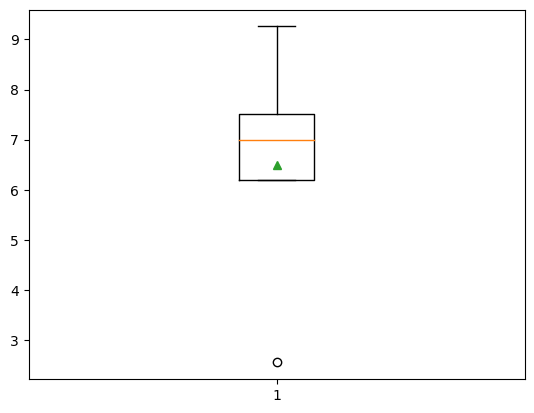

In [12]:
x = sAn.genre
y = sAn.rating
xy = sAn[['genre','rating']]
data = []
sh = x.value_counts()
for i in x.unique():
    num = 0
    buff = 0
    buffArr=[]
    buffArr = x.isin([i])
    kek = 0
    for j in buffArr:
        
        if j == True:
            buff+=y.loc[kek]
            num+=1
        kek+=1
    data.append(buff/num)
    
x1 = data
xMin = min(x1)
xMax = max(x1)
xMedian = median(x1)
x25 = []
x75 = []
for i in x1: 
    if i>=xMin and i<= xMedian: x25.append(i)
x25Mean = mean(x25)
for i in x1: 
    if (i>=xMedian and i<=xMax ): x75.append(i)
x75Mean = mean(x75)
data = [xMin, x25Mean, xMedian, x75Mean, xMax]
plt.boxplot(data, showmeans=True)
plt.show()

Столбчатая диаграмма относительно переменной X (жанра):

(array([  1.,   0.,   0.,   0.,   3.,   1.,   1.,   7.,   3.,   2.,   9.,
          6.,  13.,   9.,   9.,  19.,  23.,  19.,  38.,  39.,  67.,  69.,
         82.,  85., 119., 151., 183., 211., 210., 234., 191., 215., 237.,
        187., 157., 124., 114.,  85.,  58.,  48.,  25.,  25.,  13.,   7.,
          2.,   2.,   1.]),
 array([2.55      , 2.69276596, 2.83553191, 2.97829787, 3.12106383,
        3.26382979, 3.40659574, 3.5493617 , 3.69212766, 3.83489362,
        3.97765957, 4.12042553, 4.26319149, 4.40595745, 4.5487234 ,
        4.69148936, 4.83425532, 4.97702128, 5.11978723, 5.26255319,
        5.40531915, 5.54808511, 5.69085106, 5.83361702, 5.97638298,
        6.11914894, 6.26191489, 6.40468085, 6.54744681, 6.69021277,
        6.83297872, 6.97574468, 7.11851064, 7.2612766 , 7.40404255,
        7.54680851, 7.68957447, 7.83234043, 7.97510638, 8.11787234,
        8.2606383 , 8.40340426, 8.54617021, 8.68893617, 8.83170213,
        8.97446809, 9.11723404, 9.26      ]),
 <BarContainer obj

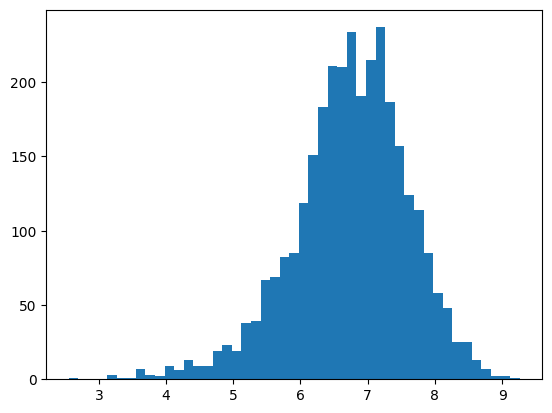

In [13]:
x = sAn.genre
y = sAn.rating
xy = sAn[['genre','rating']]
data = []
sh = x.value_counts()
for i in x.unique():
    num = 0
    buff = 0
    buffArr=[]
    buffArr = x.isin([i])
    kek = 0
    for j in buffArr:
        
        if j == True:
            buff+=y.loc[kek]
            num+=1
        kek+=1
    data.append(buff/num)

plt.hist(data, bins = 'auto', stacked=True)

Дополнительно проведу исследование невозможности корреляции категориальных и непрерывных значений в доказательство уточнений выше:

C:\Users\GrinchFour\AppData\Local\Temp\ipykernel_15528\1224171787.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sAn[["rating","members","genre"]].corr())


<Axes: >

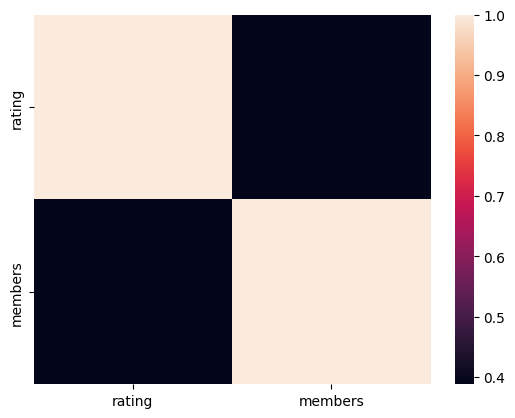

In [68]:
sns.heatmap(sAn[["rating","members","genre"]].corr())

Рейтинг и количество участников - непрерывные значения, жанр - категориальный, ЧТД.